# 简介

matplotlib 提供的函数虽然强大，但是参数太多，要想对图表进行深度的定制就需要修改一系列的参数，这一点对新手并不友好。  
另一方面，使用 matplotlib 定制的统计图是静态图表，可能在某些需要交互效果的场景下并不合适。

Seaborn 是建立在 matplotlib 之上的数据可视化工具，它相当于是对 matplotlib 进行了更高级的封装，而且 seaborn 也能跟 pandas 无缝整合，让我们可以用更少的代码构建出更好的统计图表，帮助我们探索和理解数据。Seaborn 包含但不局限于以下描述的功能：
1. 面向数据集的 API，可用于检查多个变量之间的关系。
2. 支持使用分类变量来显示观察结果或汇总统计数据。
3. 能够可视化单变量或双变量分布以及在数据子集之间进行比较的选项
4. 各类因变量线性回归模型的自动估计与作图。
5. 集成调色板和主题，轻松定制统计图表的视觉效果。

下图展示了 seaborn 绘制图表的函数，可以看出，seaborn 的这些函数主要支持我们通过绘制图表来探索数据的关系、分布和分类。  
![函数](file/seaborn函数.png)

# 导入seaborn

In [1]:
import seaborn as sns

# 设置主题
sns.set_theme()

In [2]:
# 在图表上显示中文
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

> 注意：上面的代码必须放在调用 set_theme 函数之后，否则调用 set_theme 函数时又会重新修改 matplotlib 配置参数中的字体设置。

# 示例

加载官方的 Tips 数据集（就餐小费数据），其中 total_bill 表示账单总金额，tip 表示小费的金额，sex 是顾客的性别，smoker 表示顾客是否抽样，day 代表星期几，time 代表是午餐还是晚餐，size 是就餐人数。

In [3]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## histplot

如果我们希望了解账单金额的分布，可以使用下面的代码来绘制分布图。

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

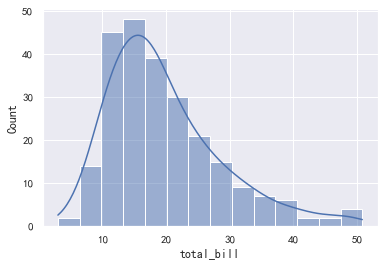

In [4]:
sns.histplot(data=tips_df, x='total_bill', kde=True)

## pairplot

如果想了解变量之间的两两关系，我们可以绘制pairplot点对图。  
pairplot对角线上是各属性自己的直方分布图，散点图是两两关系图。

**pairplot(data,hue)**  
参数：
* data：用来比较的数据
* hue：分类标签
* hue_order：标签的顺序，列表形式，数字标签无法排序
* x_vars, y_vars：x轴和y轴要展示的标签。若两轴标签数不一致，则属性本身的直方图将不会被展示。
* palette：设置标签颜色，字典或者内置颜色
* kind：除对角线，其他图的形式。默认 scatter ，还有 kde，hist，reg 一共四种
* diag_kind：对角线图的形式。默认auto，还有 hist ，kde， None
* makers：数据点的标记
* height：每张图的高度
* aspect：相对宽度，例如0.5，就是高*0.5
* corner：true或false。因为左下和右上是重复的，true只显示左下侧
* dropna：去掉缺失值

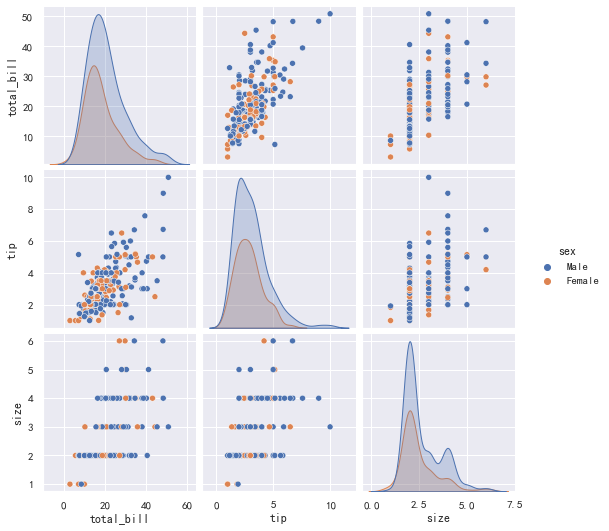

In [5]:
sns.pairplot(data=tips_df, hue='sex')

如果对上面图表的颜色不满意，还可以通过 palette 参数选择 seaborn 自带的“调色板”来修改颜色，下图展示了部分 seaborn 自带的“调色板”：

In [6]:
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [7]:
sns.color_palette('husl')

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

In [8]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [9]:
sns.color_palette('Dark2')

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

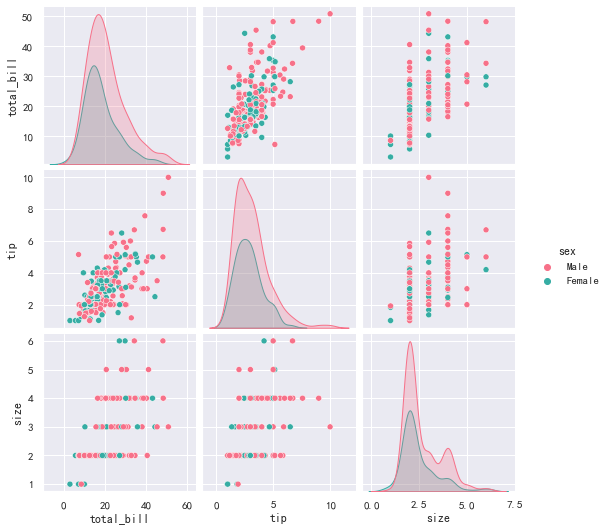

In [10]:
sns.pairplot(data=tips_df, hue='sex',palette='husl')

## jointplot

为 total_bill 和 tip 两组数据绘制联合分布图：

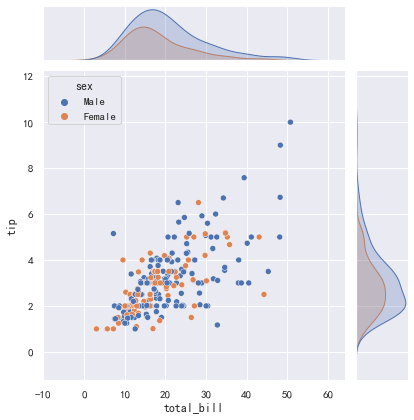

In [11]:
sns.jointplot(data=tips_df, x='total_bill', y='tip', hue='sex')

上面清晰的展示了，total_bill 和 tip 之间存在正相关关系，这一点我们也可以通过 DataFrame 对象的 corr 方法进行验证。

## lmplot

通过线性回归模型图，建立回归模型来拟合这些数据点

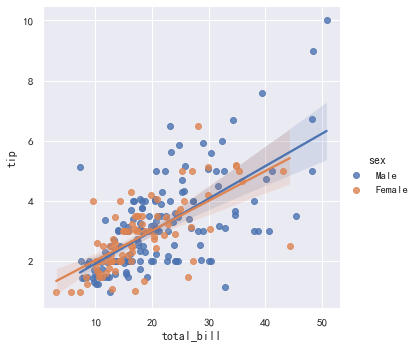

In [12]:
sns.lmplot(data=tips_df, x='total_bill', y='tip', hue='sex')

## boxplot

如果我们希望了解账单金额的集中和离散趋势，可以绘制箱线图或小提琴图

<AxesSubplot:xlabel='day', ylabel='total_bill'>

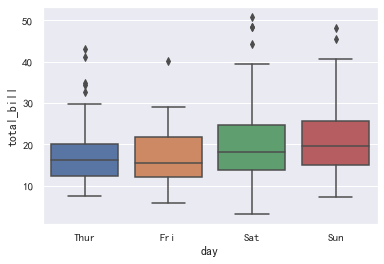

In [13]:
# 将数据按天展示
sns.boxplot(data=tips_df, x='day', y='total_bill')

## violinplot

相较于箱线图，小提琴图没有标注异常点而是显示了数据的整个范围，另一方面，小提琴图很好的展示了数据的分布（密度轨迹）。

<AxesSubplot:xlabel='day', ylabel='total_bill'>

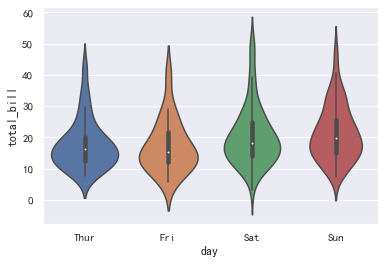

In [14]:
sns.violinplot(data=tips_df, x='day', y='total_bill')